In [1]:
import os.path
import re
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

from utils.plot import set_axis_ticks

plt.rcParams['font.family'] = 'dejavu sans'

# Load and Visualise the Flat Field Images

In [2]:
img_fits_dir = '~/Documents/Astronomical-data/spectral-data/iSHELL/230614/'

with fits.open(os.path.join(
        img_fits_dir, 'icm.2023A023.230614.flat.00004.a.fits')) as fits_file:
    flat_abnormal_img_data = fits_file[0].data
    flat_abnormal_img_header = fits_file[0].header

with fits.open(os.path.join(
        img_fits_dir, 'icm.2023A023.230614.flat.00042.a.fits')) as fits_file:
    flat_normal_img_data = fits_file[0].data
    flat_normal_img_header = fits_file[0].header


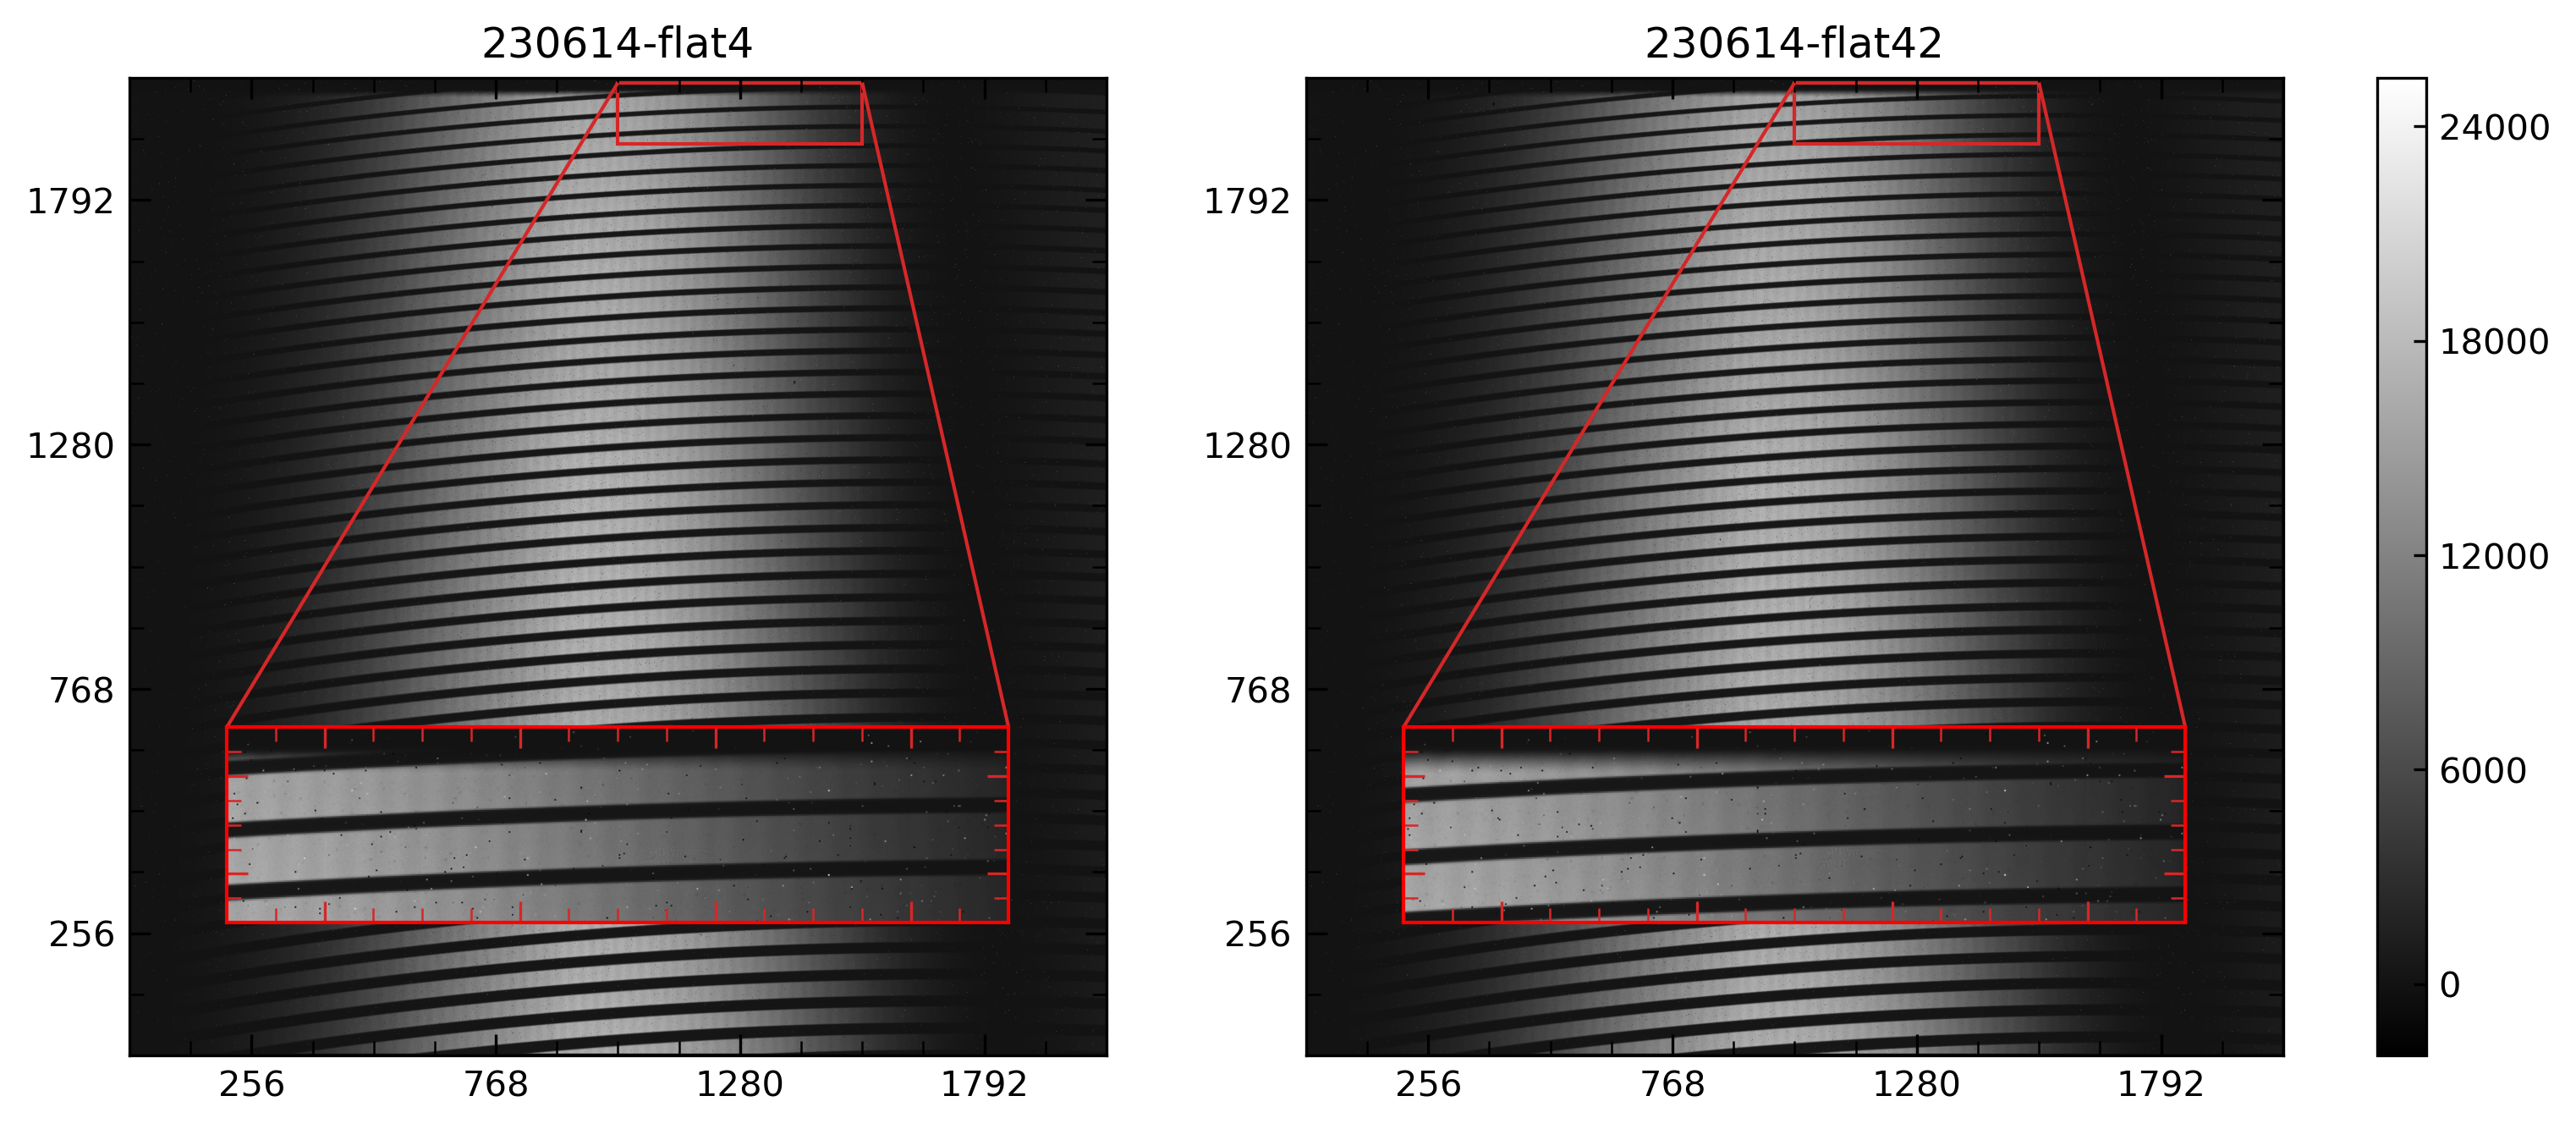

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

v_min = min(flat_normal_img_data.min(), flat_abnormal_img_data.min())
v_max = max(flat_normal_img_data.max(), flat_abnormal_img_data.max())

for axis, img_fits, img_label in zip(
        axes,
        [flat_abnormal_img_data, flat_normal_img_data],
        ['230614-flat4', '230614-flat42']
):
    axis.imshow(img_fits, cmap='gray', vmin=v_min, vmax=v_max)
    axis.set_title(img_label, fontsize=12)

    for ax in [axis.xaxis, axis.yaxis]:
        ax.set_major_locator(plt.MultipleLocator(base=512, offset=256))
        ax.set_minor_locator(plt.MultipleLocator(base=128))

    set_axis_ticks(axis)
    axis.set_aspect('equal')
    axis.invert_yaxis()

    inset_ax = inset_axes(axis, width='80%', height='40%', loc='lower center', borderpad=1)
    inset_ax.imshow(img_fits, cmap='gray', vmin=v_min, vmax=v_max)

    inset_ax.set_xlim(1024, 1536)
    inset_ax.set_ylim(1910, 2038)

    set_axis_ticks(inset_ax)
    inset_ax.xaxis.set_major_locator(plt.MultipleLocator(base=128, offset=64))
    inset_ax.xaxis.set_minor_locator(plt.MultipleLocator(base=32))
    inset_ax.set_xticklabels([])
    inset_ax.yaxis.set_major_locator(plt.MultipleLocator(base=64, offset=22))
    inset_ax.yaxis.set_minor_locator(plt.MultipleLocator(base=16, offset=22))
    inset_ax.set_yticklabels([])

    for spine in inset_ax.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(1)
    inset_ax.tick_params(axis='both', which='both', colors='tab:red')
    mark_inset(axis, inset_ax, loc1=2, loc2=1, fc='none', ec='tab:red')

cbar = fig.colorbar(
    axes[0].images[0],
    ax=axes, orientation='vertical', fraction=0.046, pad=0.04
)
cbar.ax.yaxis.set_tick_params(direction='in')
cbar.ax.yaxis.set_major_locator(plt.MultipleLocator(base=6 * 10 ** 3))

plt.show()


# Load and Visualise the Flat Field Masks
## 230614 flat4-8 (failed)

Masks of flat4-8(20) and flat4-8(10) are different
Masks of flat4-8(20) and flat4-8(no_offset) are different
Masks of flat4-8(10) and flat4-8(no_offset) are different


Text(0.5, 0.95, '230614 flat4-8 Order Mask')

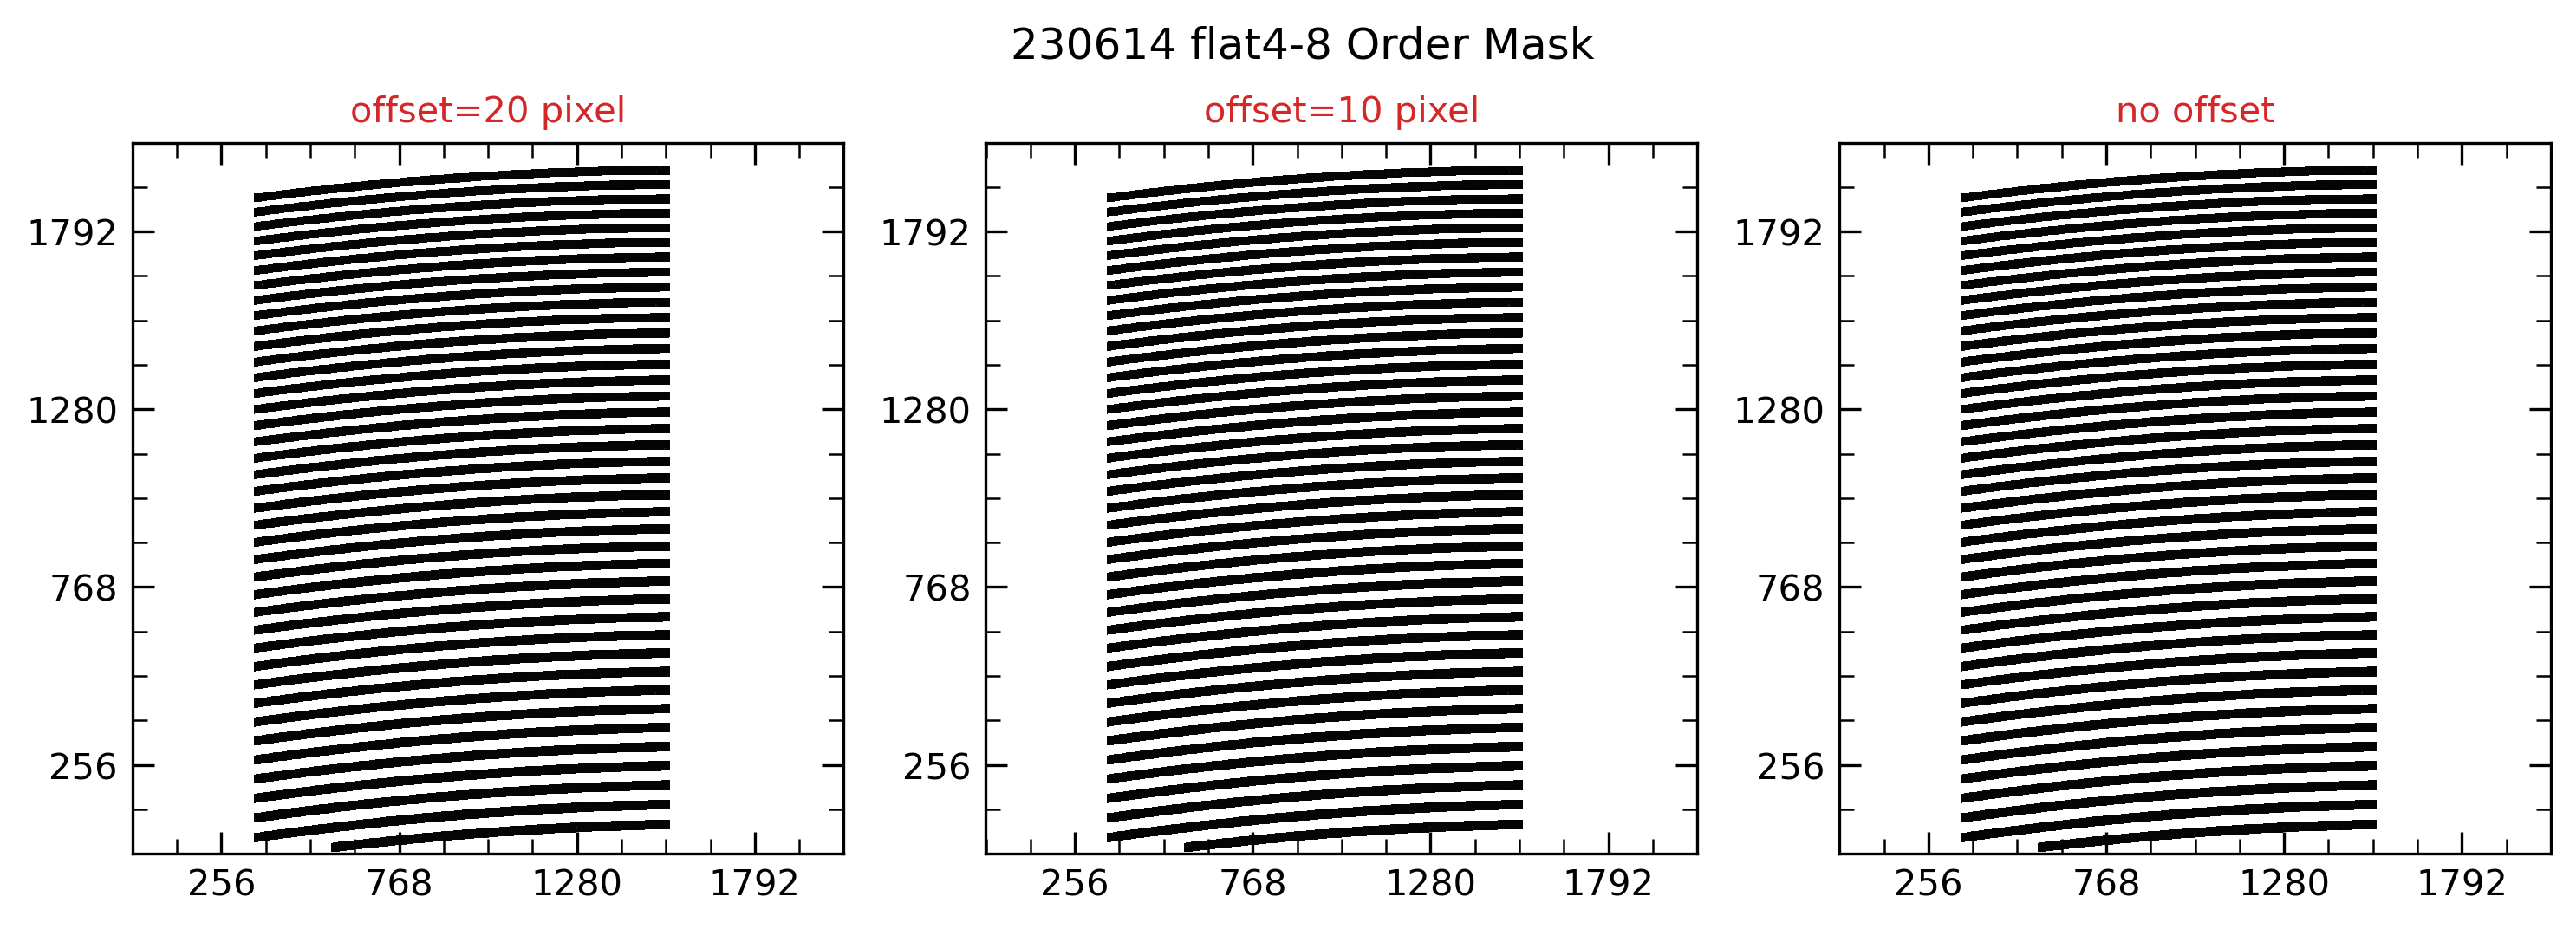

In [4]:
obs_date = '230614'
calibration_dir = f'../data/calibrations/{obs_date}/'

flat_field_fits_dict = {}
for flat_field_filename in ['flat4-8(20).fits', 'flat4-8(10).fits', 'flat4-8.fits']:
    offset = re.search(r'.*\(([-]?\d+)\)\.fits$', flat_field_filename)
    offset = str(offset.group(1)) if offset else 'no_offset'

    with fits.open(os.path.join(calibration_dir, flat_field_filename)) as fits_file:
        flat_field_fits_dict[offset] = fits_file[2].data

# check if the masks are the same
for (offset1, flat_field_fits1), (offset2, flat_field_fits2) in combinations(
        flat_field_fits_dict.items(), 2):
    if not np.all(flat_field_fits1 == flat_field_fits2):
        print(f'Masks of flat4-8({offset1}) and flat4-8({offset2}) are different')
    else:
        print(f'Masks of flat4-8({offset1}) and flat4-8({offset2}) are the same')

# visualise the masks
fig, axes = plt.subplots(1, 3, figsize=(12, 4), gridspec_kw={'wspace': .2}, dpi=300)

for axis, (offset, flat_field_fits) in zip(axes, flat_field_fits_dict.items()):
    axis.imshow(flat_field_fits, cmap='gray', vmin=0, vmax=1)

    set_axis_ticks(axis)
    axis.set_aspect('equal')
    axis.invert_yaxis()

    axis.set_title(f'offset={offset} pixel' if offset != 'no_offset' else 'no offset',
                   fontsize=10, color='tab:red')
    for ax in [axis.xaxis, axis.yaxis]:
        ax.set_major_locator(plt.MultipleLocator(base=512, offset=256))
        ax.set_minor_locator(plt.MultipleLocator(base=128))

fig.suptitle(f'{obs_date} flat4-8 Order Mask', fontsize=12, y=.95)

## 230617 flat9-13 (adjusting offset to -24 worked)

Masks of flat5-9(-24) and flat5-9(no_offset) are different


Text(0.5, 0.95, '230617 flat5-9 Order Mask')

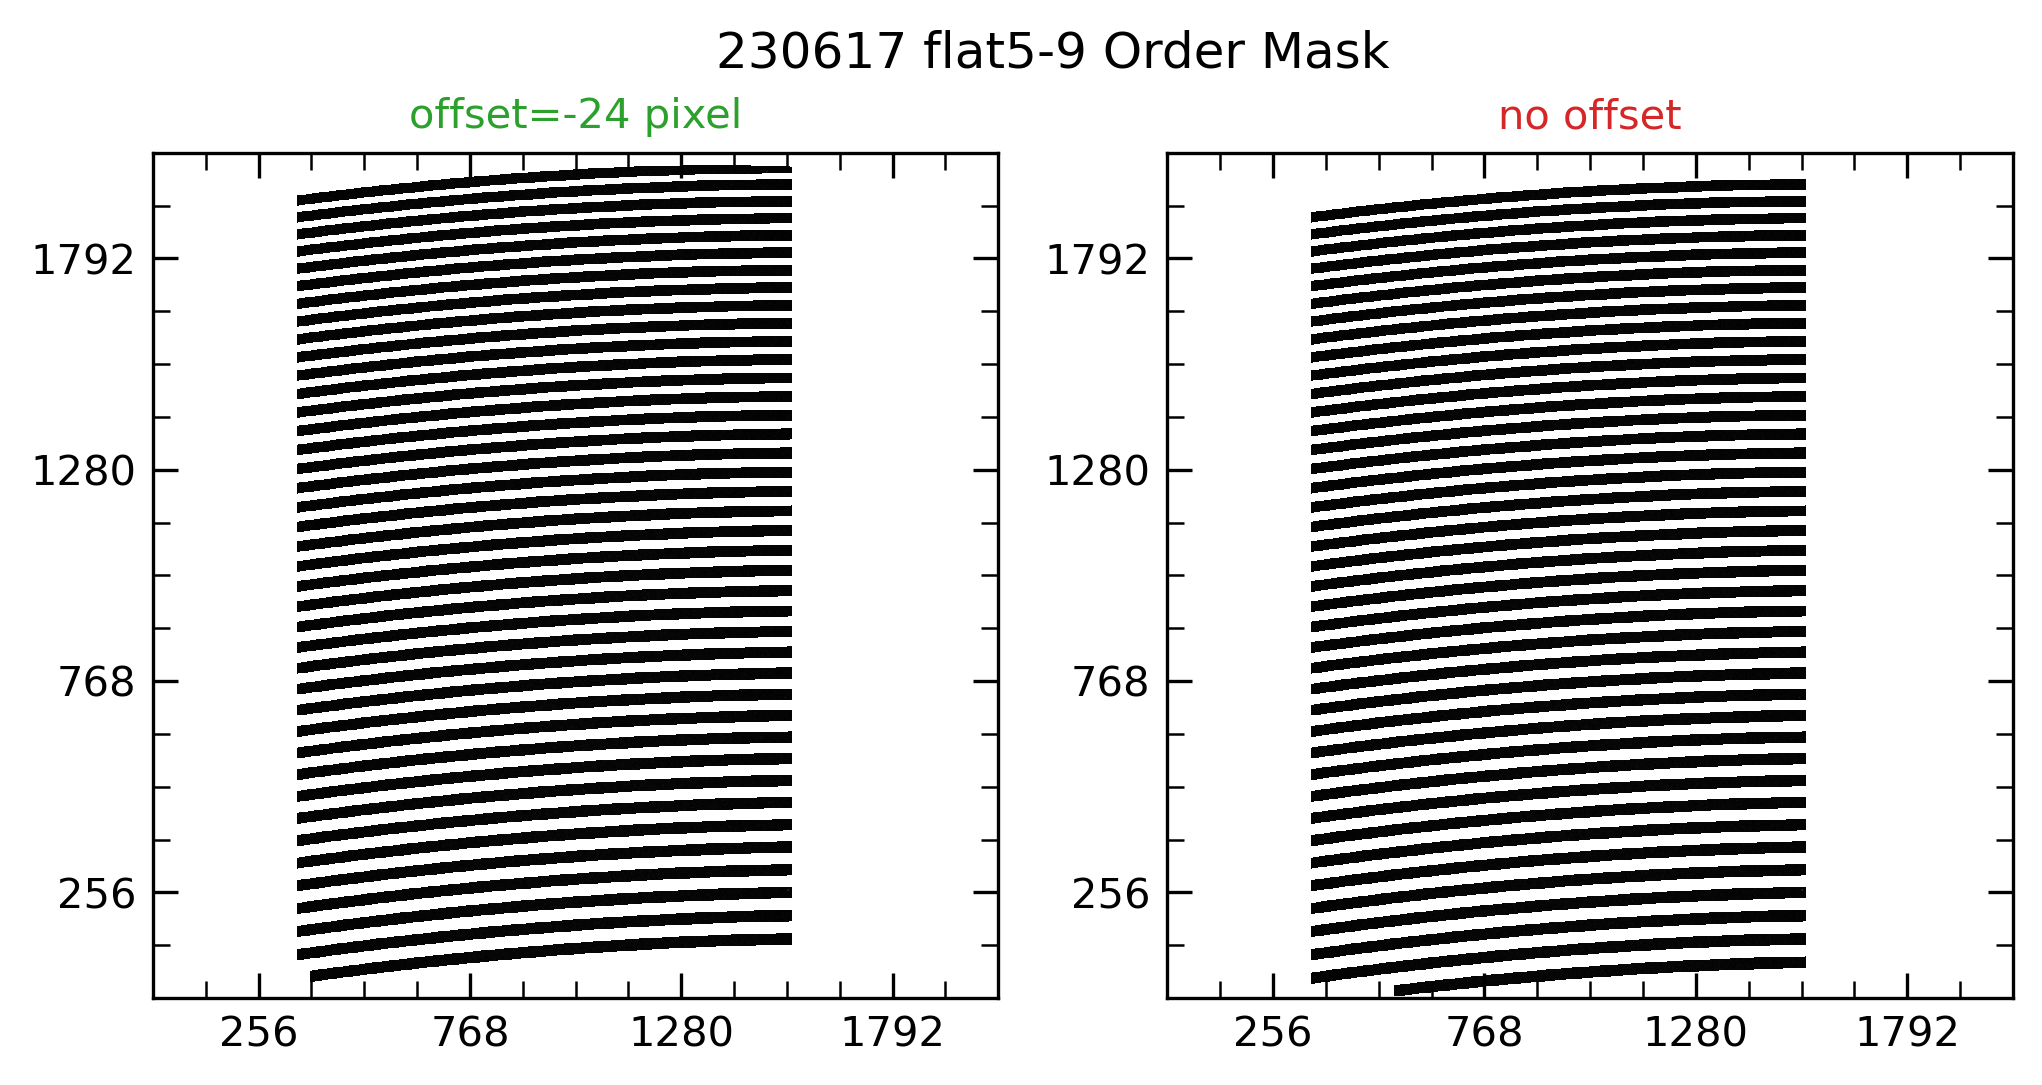

In [5]:
obs_date = '230617'
calibration_dir = f'../data/calibrations/{obs_date}/'

flat_field_fits_dict = {}
for flat_field_filename in ['flat5-9(-24).fits', 'flat5-9.fits']:
    offset = re.search(r'.*\(([-]?\d+)\)\.fits$', flat_field_filename)
    offset = str(offset.group(1)) if offset else 'no_offset'

    with fits.open(os.path.join(calibration_dir, flat_field_filename)) as fits_file:
        flat_field_fits_dict[offset] = fits_file[2].data

for (offset1, flat_field_fits1), (offset2, flat_field_fits2) in combinations(
        flat_field_fits_dict.items(), 2):
    if not np.all(flat_field_fits1 == flat_field_fits2):
        print(f'Masks of flat5-9({offset1}) and flat5-9({offset2}) are different')
    else:
        print(f'Masks of flat5-9({offset1}) and flat5-9({offset2}) are the same')

# visualise the masks
fig, axes = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'wspace': .2}, dpi=300)

for axis, (offset, flat_field_fits) in zip(axes, flat_field_fits_dict.items()):
    axis.imshow(flat_field_fits, cmap='gray', vmin=0, vmax=1)

    set_axis_ticks(axis)
    axis.set_aspect('equal')
    axis.invert_yaxis()

    axis.set_title(f'offset={offset} pixel' if offset != 'no_offset' else 'no offset',
                   fontsize=10, color='tab:green' if offset == '-24' else 'tab:red')
    for ax in [axis.xaxis, axis.yaxis]:
        ax.set_major_locator(plt.MultipleLocator(base=512, offset=256))
        ax.set_minor_locator(plt.MultipleLocator(base=128))
    
fig.suptitle(f'{obs_date} flat5-9 Order Mask', fontsize=12, y=.95)